___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
USAhousing = pd.read_csv('Ecommerce Customers')

**Check the head of customers, and check out its info() and describe() methods.**

In [3]:
USAhousing.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
USAhousing.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
USAhousing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

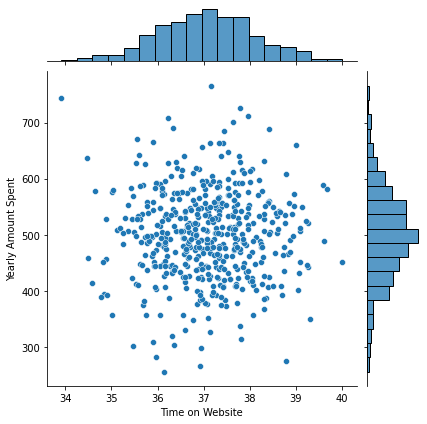

In [6]:
ff= sns.jointplot(data=USAhousing, x="Time on Website", y="Yearly Amount Spent")
ff

** Do the same but with the Time on App column instead. **

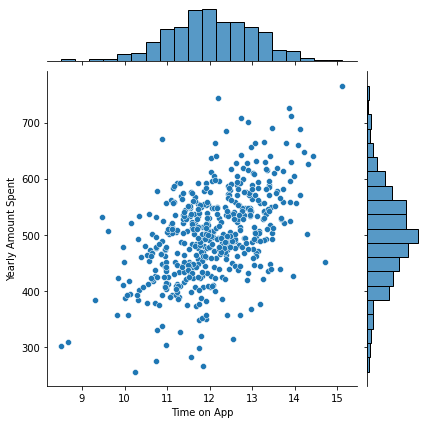

In [7]:
gg= sns.jointplot(data=USAhousing, x="Time on App", y="Yearly Amount Spent")
gg

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

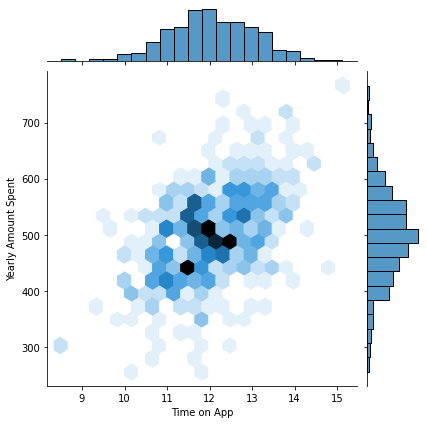

In [8]:
hh= sns.jointplot(data=USAhousing, kind = "hex", x="Time on App", y="Yearly Amount Spent")
hh

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

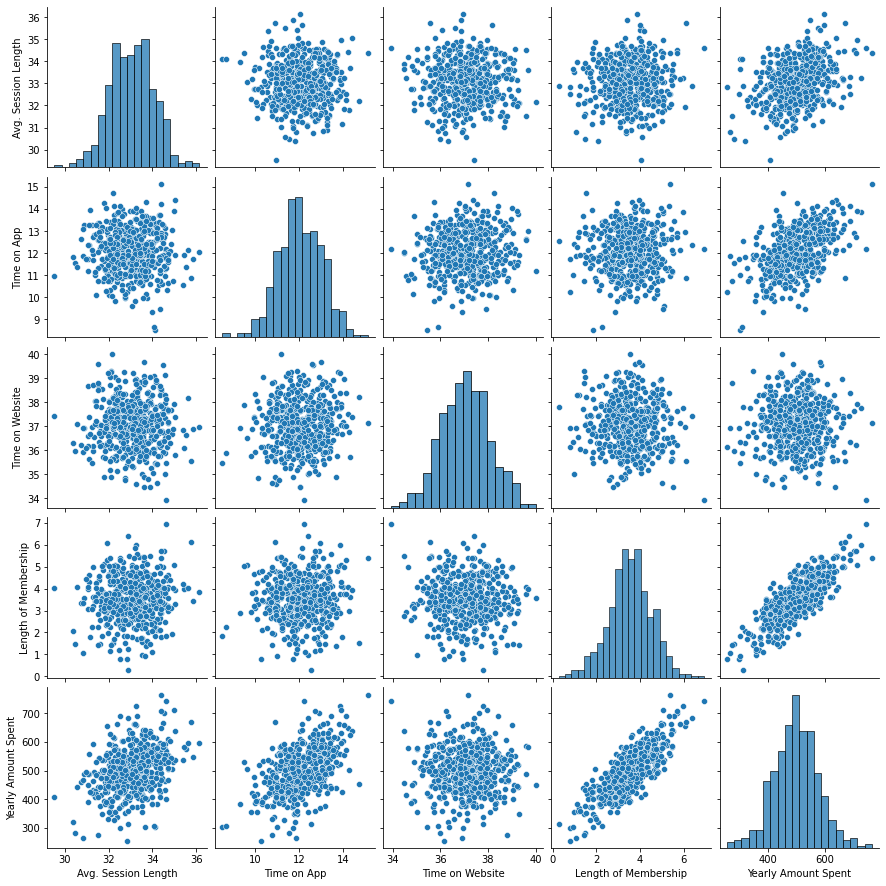

In [9]:
sns.pairplot(USAhousing)

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

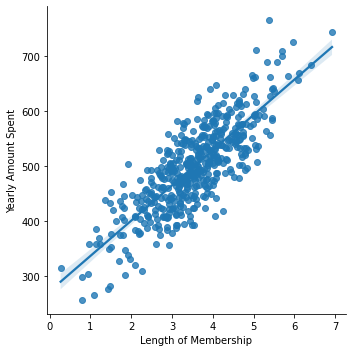

In [10]:
sns.lmplot(x ='Length of Membership', y ='Yearly Amount Spent', data = USAhousing)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [11]:
USAhousing.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [12]:
X = USAhousing[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = USAhousing['Yearly Amount Spent']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [16]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [17]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [18]:
lm.fit(X_train,y_train)

LinearRegression()

**Print out the coefficients of the model**

In [19]:
print(lm.intercept_)

-1047.9327822502391


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [21]:
predictions = lm.predict(X_test)

** Create a scatterplot of the real test values versus the predicted values. **

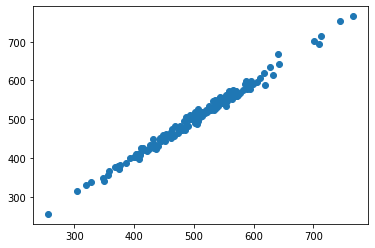

In [22]:
plt.scatter(y_test,predictions)

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

In [23]:
from sklearn import metrics

In [24]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 7.228148653430839
MSE: 79.81305165097443
RMSE: 8.933815066978633


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

/home/taher/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


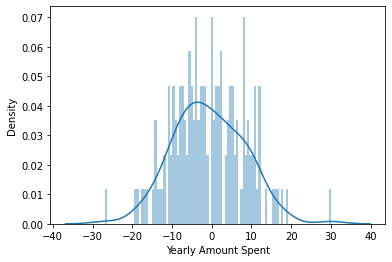

In [25]:
sns.distplot((y_test-predictions),bins=100);

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforst on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import  mean_squared_error
import pandas as pd

diabetes = datasets.load_diabetes()


#print(diabetes)
#print(diabetes['DESCR'])
#print(diabetes['feature_names'])
#print(diabetes['target'])

#df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
#ff = df

#print(ff)


diabetes_X = diabetes.data

#print(type(diabetes_X))

#print(len(diabetes_X))


print(diabetes_X[0])



diabetes_X_train = diabetes_X[:-30]
diabetes_X_test = diabetes_X[-30:]


#print(diabetes_X_train)
#print(diabetes_X_test) 

diabetes_y_train = diabetes.target[:-30]
diabetes_y_test = diabetes.target[-30:]

#print(diabetes_y_train)
#print(diabetes_y_test) 


model = linear_model.LinearRegression()

model.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_predicted = model.predict(diabetes_X_test)

print("Mean squared error is: ", mean_squared_error(diabetes_y_test, diabetes_y_predicted))

print("Weights: ", model.coef_)
print("Intercept: ", model.intercept_)


#from sklearn.datasets import load_iris
#import pandas as pd

#data = load_iris()
#df = pd.DataFrame(data.data, columns=data.feature_names)
#df.head()

[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]
Mean squared error is:  1826.536419134542
Weights:  [  -1.16924976 -237.18461486  518.30606657  309.04865826 -763.14121622
  458.90999325   80.62441437  174.32183366  721.49712065   79.19307944]
Intercept:  153.05827988224112


In [27]:
a=range(300)
print(a)

a[-40:]


range(0, 300)


range(260, 300)

[1]
[[9.99250016e-01 7.49984089e-04]
 [9.99240201e-01 7.59799387e-04]
 [9.99230257e-01 7.69743043e-04]
 ...
 [3.08374822e-03 9.96916252e-01]
 [3.04400296e-03 9.96955997e-01]
 [3.00476842e-03 9.96995232e-01]]


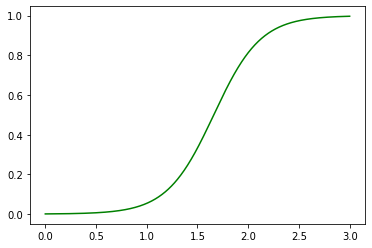

In [28]:
# Train a logistic regression classifier to predict whether a flower is iris virginica or not
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()
# print(list(iris.keys()))
# print(iris['data'].shape)
# print(iris['target'])
# print(iris['DESCR'])

X = iris["data"][:, 3:]
y = (iris["target"] == 2).astype(np.int32)

# Train a logistic regression classifier
clf = LogisticRegression()
clf.fit(X,y)
example = clf.predict(([[2.6]]))
print(example)

# Using matplotlib to plot the visualization
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = clf.predict_proba(X_new)
print(y_prob)
plt.plot(X_new, y_prob[:,1], "g-", label="virginica")
plt.show()


# print(y)
# print(iris["data"])
# print(X)


In [29]:
housing = pd.read_csv('housing15.csv')

In [30]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [31]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       498 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [32]:
#housing.columns = housing.columns.str.replace(' ', '')
#housing["ZN"] = housing["ZN"].astype(str).astype(np.float64)
  
#print(housing.dtypes)

#housing[['ZN','CRIM']]=housing[['ZN','CRIM']].apply(lambda x : x.str.strip())
#housing["ZN"] = housing["ZN"].astype(str).astype(np.float64)
#print(housing.dtypes)

In [33]:
housing.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.285149,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705445,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

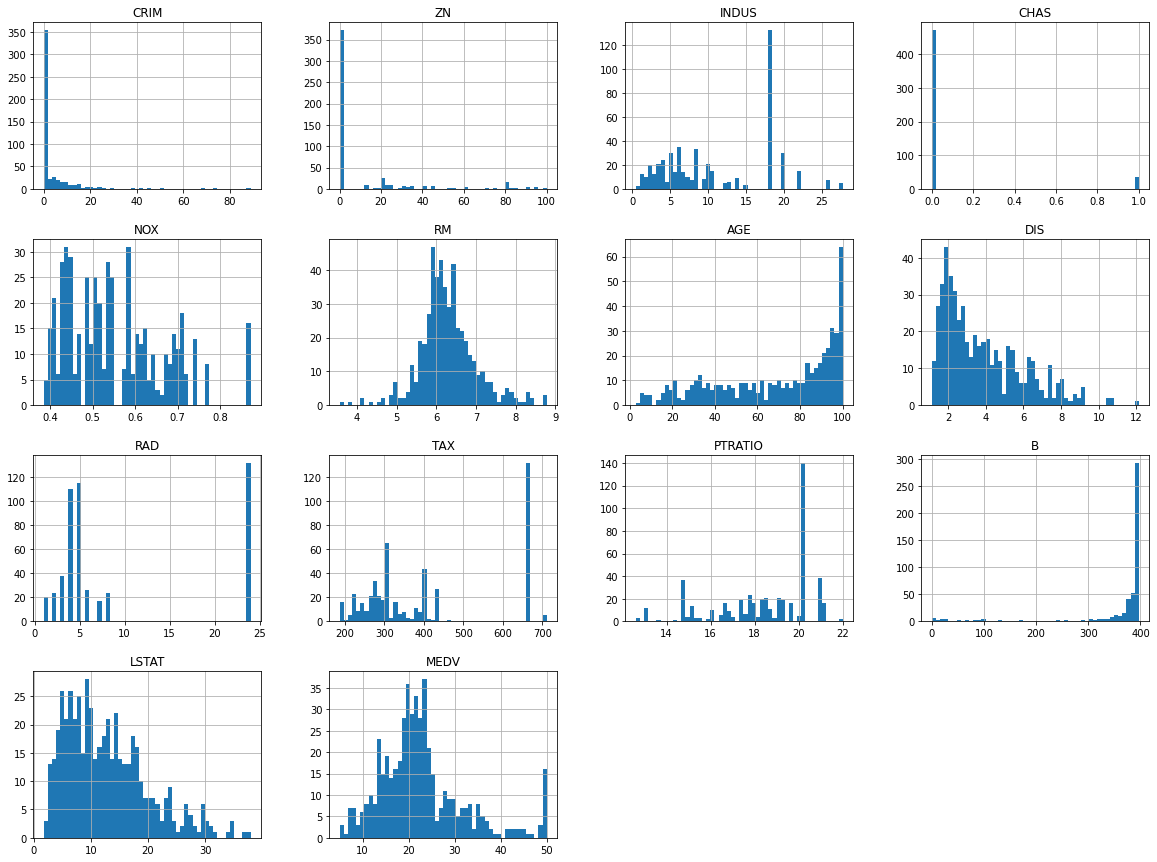

In [34]:
housing.hist(bins=50, figsize=(20,15))


In [35]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)* test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]



In [36]:
#train_set, test_set = split_train_test(housing, 0.2)


In [37]:
#train_set

In [38]:
#print('train_set', train_set)
#print('test_set', test_set)

In [39]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print('train_set', len(train_set))
print('test_set', len(test_set))

train_set 404
test_set 102


In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    #print("TRAIN:", train_index, "TEST:", test_index)
    train_set = housing.loc[train_index]
    test_set = housing.loc[test_index]
    #print("TRAIN:", train_set, "TEST:", test_set)

In [41]:
train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [42]:
test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [43]:
housing = train_set.copy()

In [44]:
corr_matrix = housing.corr()

In [45]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678928
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

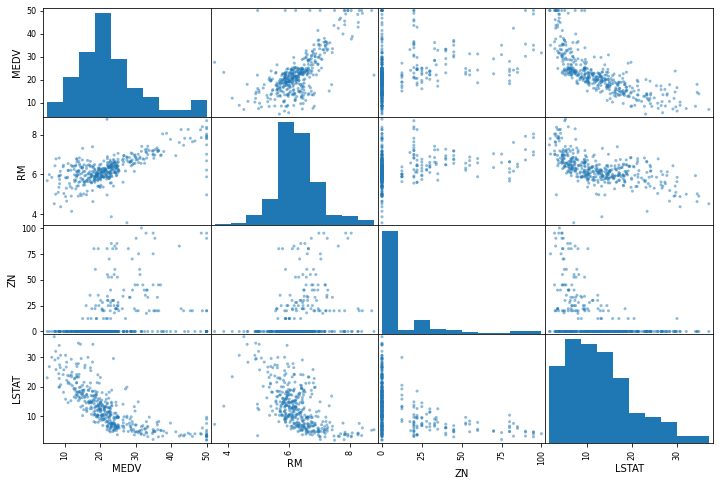

In [46]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes], figsize=(12,8))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

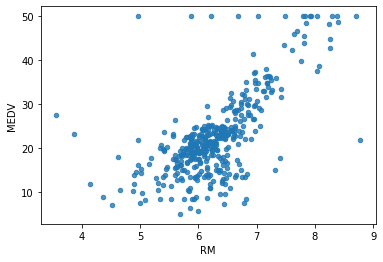

In [47]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

In [48]:
housing['TAXRM']= housing['TAX']/housing['RM']
housing['TAXRM']

254     51.571709
348     42.200452
476    102.714374
321     45.012547
326     45.468948
          ...    
155     65.507152
423    109.126659
98      35.294118
455    102.068966
216     46.875000
Name: TAXRM, Length: 404, dtype: float64

In [49]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [50]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.678928
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.526601
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

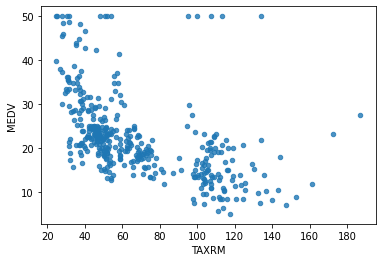

In [51]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [52]:
housing = train_set.drop("MEDV", axis=1)
housing_labels = train_set["MEDV"].copy()

In [53]:
a = housing.dropna(subset=["RM"])
a.shape

(399, 13)

In [54]:
housing.drop("RM", axis=1).shape

(404, 12)

In [55]:
median = housing["RM"].median()

In [56]:
median

6.211

In [57]:
housing["RM"].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [58]:
housing.shape

(404, 13)

In [59]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280694,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715273,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [60]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
imputer.fit(housing)

SimpleImputer(strategy='median')

In [61]:
#housing.isnull().sum(axis = 0)
housing.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [62]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21100e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [63]:
X = imputer.transform(housing)

In [64]:
housing_tr = pd.DataFrame(X, columns=housing.columns)

In [65]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279832,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710863,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.211000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.629250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [66]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('std_scaler', StandardScaler())
                       ])

In [67]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [68]:
housing_num_tr.shape

(404, 13)

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = LinearRegression()
#model = DecisionTreeRegressor() 
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [70]:
some_data = housing.iloc[:5]

In [71]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [72]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15


In [73]:
some_labels=housing_labels.iloc[:5]

In [74]:
prepared_data = my_pipeline.transform(some_data)

In [88]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24202223, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [76]:
model.predict(prepared_data)

array([22.449, 25.496, 16.544, 23.351, 23.471])

In [77]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [78]:
lin_rmse

1.2072430921994814

In [79]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [80]:
rmse_scores

array([2.87973021, 2.84856855, 4.31525619, 2.5232862 , 3.61634944,
       2.7169529 , 4.67736072, 3.34753737, 3.15709976, 3.49595211])

In [81]:
def print_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())


In [82]:
print_scores(rmse_scores)

Scores [2.87973021 2.84856855 4.31525619 2.5232862  3.61634944 2.7169529
 4.67736072 3.34753737 3.15709976 3.49595211]
Mean 3.357809346054508
Standard Deviation 0.6617588874523379


In [83]:
#DecisionTreeRegressor
#Scores [4.19982578 4.9979508  4.92450319 3.84555493 3.82945819 3.31209903 5.24652266 3.69614664 3.42881175 4.29970929]
#Mean 4.178058225774352
#Standard Deviation 0.6451253979750378

In [84]:
#LinearRegression
#Scores [4.24479953 4.26471885 5.1054845  3.83628891 5.3474586  4.38533567 7.46100832 5.48662149 4.14433184 6.07150391]
#Mean 5.034755162984878
#Standard Deviation 1.0552927621823225 

#RandomForestRegressor
#Scores [2.88831041 2.79588584 4.4338438  2.45809983 3.46240081 2.76427833 4.71741202 3.36273007 3.32430267 3.34424497]
#Mean 3.3551508738067723
#Standard Deviation 0.686768719034922

In [85]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

In [86]:
X_test = test_set.drop("MEDV", axis=1)
Y_test = test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_predictions)
print(list(Y_test))

[24.321 10.994 25.356 22.596 19.074 15.279 20.436 14.565 32.273 41.334
 19.587 11.529 24.657 27.962 19.62  11.486 31.526 14.403 23.741 18.493
 20.022 17.492 17.31  22.275 18.939 31.383 16.338 32.7    8.607 33.451
 22.95  21.35  22.847 10.408 20.774 10.915 42.97  24.775 23.924 41.564
 23.935 29.914 20.63  21.097 18.727 33.875 43.812 20.114 20.268 22.025
 21.401 14.592 20.854 14.728 24.861 32.665 41.854 28.958 19.151 20.823
 46.985  9.851 18.8   25.296 14.501 32.592 20.034 18.599 18.814 34.491
 25.415 22.967 21.984 22.516 34.91  12.725 15.744 20.028 20.771 21.728
 22.41  21.184 14.425 23.344 20.928 21.254 14.044 21.317 21.387 23.136
 18.753 27.36   7.363 26.311 19.39  29.481 20.17  25.375 14.163 27.455
 21.715 20.349]
[16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 23.4, 19.5, 33.1

In [87]:
final_rmse

2.836472638579784

** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.